In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install tensorflow==1.13.1

     |████████████████████████████████| 92.6 MB 1.2 MB/s 
     |████████████████████████████████| 367 kB 46.8 MB/s 
     |████████████████████████████████| 3.2 MB 38.3 MB/s 
     |████████████████████████████████| 50 kB 5.7 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.7.0
    Uninstalling tensorflow-2.7.0:
      Successfully uninstalled tensorflow-2.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.7 requires tensorflow>=2.0.0, but you

In [3]:
pip install tensorflow-object-detection-api

     |████████████████████████████████| 577 kB 5.4 MB/s 
     |████████████████████████████████| 54 kB 2.6 MB/s 
     |████████████████████████████████| 54 kB 2.2 MB/s 
     |████████████████████████████████| 3.6 MB 52.5 MB/s 
  Created wheel for tensorflow-object-detection-api: filename=tensorflow_object_detection_api-0.1.1-py3-none-any.whl size=844512 sha256=27a769786abf29f08555344e17b9a2ebca096b3b4b0d82feb4e0e9c70466c9e0
  Stored in directory: /root/.cache/pip/wheels/71/7e/a2/461ab817fbaef68ec9cc60df16d3669d1285f032e4c98179bf
Successfully built tensorflow-object-detection-api


In [4]:
pip install xmljson

In [5]:
import hashlib
import io
import logging
import os
import random
import re

from lxml import etree
import PIL.Image
import tensorflow as tf
from xmljson import parker
from xml.etree.ElementTree import fromstring

from object_detection.utils import dataset_util
from object_detection.utils import label_map_util

###

from __future__ import division
from __future__ import print_function
from __future__ import absolute_import

import os
import io
import pandas as pd
import tensorflow as tf

from PIL import Image
from object_detection.utils import dataset_util
from collections import namedtuple, OrderedDict

import imgaug as ia
ia.seed(1)
# imgaug uses matplotlib backend for displaying images
%matplotlib inline
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
from imgaug import augmenters as iaa 
# imageio library will be used for image input/output
import imageio
import pandas as pd
import numpy as np
import re
import os
import glob
# this library is needed to read XML files for converting it into CSV
import xml.etree.ElementTree as ET
import shutil
from tqdm import tqdm
import pickle

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [6]:
length = 7502

common_path = "/content/drive/MyDrive/yolo btp/oxfordtowncenter"

csv_file = "/content/drive/MyDrive/yolo btp/oxfordtowncenter/TownCentre-groundtruth.top.txt"
video_file = "/content/drive/MyDrive/yolo btp/oxfordtowncenter/TownCentreXVID.mp4"
print("Declaring path to raw data :")
print("="*50)
print("common_path :",common_path)
print("csv_file    :",csv_file)
print("video_file  :",video_file)

print()

train = common_path + "/" + "train"
test = common_path + "/" + "test"

#split Ratio
print("Split Ratio :")
print("="*50)
print("train path : {}".format(train))
print("test path  : {}".format(test))
print()
print("-Note")
print("--train : {} that is {} % of the whole data".format(len(os.listdir(train)) , len(os.listdir(train)) / length))
print("--test  : {} that is {} % of the whole data".format(len(os.listdir(test)) , len(os.listdir(test)) / length) )

print()
xml_path = common_path + "/" + "xmls"

#3076 , 3082 , 3086 are missing,so removed it from the train files.
print("="*50)
print("xml_path : {}".format(xml_path))
print()
print("-Note")
print("--No. of total XML files are {} == no. of train files.".format(len(os.listdir(xml_path))))

Declaring path to raw data :
common_path : /content/drive/MyDrive/yolo btp/oxfordtowncenter
csv_file    : /content/drive/MyDrive/yolo btp/oxfordtowncenter/TownCentre-groundtruth.top.txt
video_file  : /content/drive/MyDrive/yolo btp/oxfordtowncenter/TownCentreXVID.mp4

Split Ratio :
train path : /content/drive/MyDrive/yolo btp/oxfordtowncenter/train
test path  : /content/drive/MyDrive/yolo btp/oxfordtowncenter/test

-Note
--train : 2963 that is 0.39496134364169555 % of the whole data
--test  : 2501 that is 0.3333777659290856 % of the whole data

xml_path : /content/drive/MyDrive/yolo btp/oxfordtowncenter/xmls

-Note
--No. of total XML files are 3600 == no. of train files.


In [7]:
images = []
ids = []
for index, file in tqdm(enumerate(glob.glob(train+ '/*.jpg'))):
    ids.append(file[63:-4])
    images.append(imageio.imread(file))

2963it [02:04, 23.79it/s]


In [8]:
images = []
ids = []
for index, file in tqdm(enumerate(glob.glob(train + '/*.jpg'))):
    ids.append(file[63:-4])
    images.append(imageio.imread(file))
    
# how many images we have
print('We have {} images'.format(len(images)))

data = pd.DataFrame(columns = ["ids" , "images"])

data["ids"] = ids
data["images"] = images

data = data.astype({"ids" : int})

data = data.sort_values(by = "ids")

data

2963it [01:41, 29.20it/s]


We have 2963 images


ValueError: ignored

In [16]:
data

,ids,images
0,,"[[[118, 113, 117], [120, 115, 121], [127, 122,..."
1,,"[[[119, 114, 120], [121, 116, 122], [129, 124,..."
2,,"[[[118, 113, 117], [120, 115, 121], [127, 122,..."
3,,"[[[119, 114, 120], [121, 116, 122], [129, 124,..."
4,,"[[[125, 113, 115], [131, 119, 121], [139, 129,..."
...,...,...
2958,,"[[[124, 113, 117], [131, 120, 124], [143, 132,..."
2959,,"[[[124, 113, 117], [131, 120, 124], [143, 132,..."
2960,,"[[[126, 115, 119], [131, 120, 124], [140, 129,..."
2961,,"[[[125, 114, 118], [130, 119, 123], [141, 132,..."


In [9]:
def xml_to_csv():
    xml_list = []
    for xml_file in glob.glob(xml_path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            value = (root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     member[0].text,
                     int(member[1][0].text),
                     int(member[1][1].text),
                     int(member[1][2].text),
                     int(member[1][3].text)
                     )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df


xml_df = xml_to_csv()
xml_df
xml_df["ids"] = [int(i[:-4]) for i in xml_df.filename]
xml_df = xml_df.sort_values(by = "ids")

In [10]:
xml_df

,filename,width,height,class,xmin,ymin,xmax,ymax,ids
51198,20.jpg,960,540,pedestrian,904,150,954,259,20
51196,20.jpg,960,540,pedestrian,739,7,765,74,20
51199,20.jpg,960,540,pedestrian,874,307,935,456,20
51197,20.jpg,960,540,pedestrian,467,30,493,101,20
54598,21.jpg,960,540,pedestrian,29,445,107,637,21
...,...,...,...,...,...,...,...,...,...
14571,3599.jpg,960,540,pedestrian,53,207,107,324,3599
14570,3599.jpg,960,540,pedestrian,28,195,83,310,3599
14569,3599.jpg,960,540,pedestrian,615,45,641,121,3599
14584,3599.jpg,960,540,pedestrian,854,118,895,217,3599


In [17]:
!pip install pandas

In [20]:
xml_df['ids']=xml_df['ids'].astype(str)
data['ids']=data['ids'].astype(str)
ultimate_df = pd.merge(xml_df , data , on = "ids",how = "left")
ultimate_df

,filename,width,height,class,xmin,ymin,xmax,ymax,ids,images
0,20.jpg,960,540,pedestrian,904,150,954,259,20,NaN
1,20.jpg,960,540,pedestrian,739,7,765,74,20,NaN
2,20.jpg,960,540,pedestrian,874,307,935,456,20,NaN
3,20.jpg,960,540,pedestrian,467,30,493,101,20,NaN
4,21.jpg,960,540,pedestrian,29,445,107,637,21,NaN
...,...,...,...,...,...,...,...,...,...,...
56778,3599.jpg,960,540,pedestrian,53,207,107,324,3599,NaN
56779,3599.jpg,960,540,pedestrian,28,195,83,310,3599,NaN
56780,3599.jpg,960,540,pedestrian,615,45,641,121,3599,NaN
56781,3599.jpg,960,540,pedestrian,854,118,895,217,3599,NaN


In [21]:
with open("ultimate_data.pickle" , "wb") as file:
    pickle.dump(ultimate_df , file)
shutil.move("/content/ultimate_data.pickle" , common_path)

'/content/drive/MyDrive/yolo btp/oxfordtowncenter/ultimate_data.pickle'

In [22]:
def bbs_obj_to_df(bbs_object):
#     convert BoundingBoxesOnImage object into array
    bbs_array = bbs_object.to_xyxy_array()
#     convert array into a DataFrame ['xmin', 'ymin', 'xmax', 'ymax'] columns
    df_bbs = pd.DataFrame(bbs_array, columns=['xmin', 'ymin', 'xmax', 'ymax'])
    return df_bbs

aug = iaa.SomeOf(2, [    
    iaa.Affine(scale=(0.5, 1.5)),
    iaa.Affine(rotate=(-60, 60)),
    iaa.Affine(translate_percent={"x": (-0.3, 0.3), "y": (-0.3, 0.3)}),
    iaa.Fliplr(1),
    iaa.Multiply((0.5, 1.5)),
    iaa.GaussianBlur(sigma=(1.0, 3.0)),
    iaa.AdditiveGaussianNoise(scale=(0.03*255, 0.05*255))
])

In [23]:
def image_aug(df, images_path, aug_images_path, image_prefix, augmentor):
    # create data frame which we're going to populate with augmented image info
    aug_bbs_xy = pd.DataFrame(columns=
                              ['filename','width','height','class', 'xmin', 'ymin', 'xmax', 'ymax']
                             )
    grouped = df.groupby('filename')
    
    for filename in df['filename'].unique():
    #   get separate data frame grouped by file name
        group_df = grouped.get_group(filename)
        group_df = group_df.reset_index()
        group_df = group_df.drop(['index'], axis=1)   
    #   read the image
        image = imageio.imread(images_path+filename)
    #   get bounding boxes coordinates and write into array        
        bb_array = group_df.drop(['filename', 'width', 'height', 'class' , "ids"], axis=1).values
    #   pass the array of bounding boxes coordinates to the imgaug library
        #print(bb_array)
        bbs = BoundingBoxesOnImage.from_xyxy_array(bb_array, shape=image.shape)
    #   apply augmentation on image and on the bounding boxes
        image_aug, bbs_aug = augmentor(image=image, bounding_boxes=bbs)
    #   disregard bounding boxes which have fallen out of image pane    
        bbs_aug = bbs_aug.remove_out_of_image()
    #   clip bounding boxes which are partially outside of image pane
        bbs_aug = bbs_aug.clip_out_of_image()
        
    #   don't perform any actions with the image if there are no bounding boxes left in it    
        if re.findall('Image...', str(bbs_aug)) == ['Image([]']:
            pass
        
    #   otherwise continue
        else:
        #   write augmented image to a file
            imageio.imwrite(aug_images_path+image_prefix+filename, image_aug)  
        #   create a data frame with augmented values of image width and height
            info_df = group_df.drop(['xmin', 'ymin', 'xmax', 'ymax'], axis=1)    
            for index, _ in info_df.iterrows():
                info_df.at[index, 'width'] = image_aug.shape[1]
                info_df.at[index, 'height'] = image_aug.shape[0]
        #   rename filenames by adding the predifined prefix
            info_df['filename'] = info_df['filename'].apply(lambda x: image_prefix+x)
        #   create a data frame with augmented bounding boxes coordinates using the function we created earlier
            bbs_df = bbs_obj_to_df(bbs_aug)
        #   concat all new augmented info into new data frame
            aug_df = pd.concat([info_df, bbs_df], axis=1)
        #   append rows to aug_bbs_xy data frame
            aug_bbs_xy = pd.concat([aug_bbs_xy, aug_df])            
    
    # return dataframe with updated images and bounding boxes annotations 
    aug_bbs_xy = aug_bbs_xy.reset_index()
    aug_bbs_xy = aug_bbs_xy.drop(['index'], axis=1)
    return aug_bbs_xy

In [27]:
augmented_images_df = image_aug(xml_df, train + "/", common_path +"/" +'aug_images/', 'aug1_', aug)
augmented_images_df

,filename,width,height,class,xmin,ymin,xmax,ymax,ids
0,aug1_20.jpg,960,540,pedestrian,674.000000,153.000000,724.000000,262.000000,20
1,aug1_20.jpg,960,540,pedestrian,509.000000,10.000000,535.000000,77.000000,20
2,aug1_20.jpg,960,540,pedestrian,644.000000,310.000000,705.000000,459.000000,20
3,aug1_20.jpg,960,540,pedestrian,237.000000,33.000000,263.000000,104.000000,20
4,aug1_21.jpg,960,540,pedestrian,186.257858,251.657013,265.590363,359.141846,21
...,...,...,...,...,...,...,...,...,...
56778,aug1_3599.jpg,960,540,pedestrian,852.000000,207.000000,906.000000,324.000000,3599
56779,aug1_3599.jpg,960,540,pedestrian,876.000000,195.000000,931.000000,310.000000,3599
56780,aug1_3599.jpg,960,540,pedestrian,318.000000,45.000000,344.000000,121.000000,3599
56781,aug1_3599.jpg,960,540,pedestrian,64.000000,118.000000,105.000000,217.000000,3599


In [28]:
augmented_images_df = augmented_images_df.sort_values(by = "ids")
augmented_images_df = augmented_images_df.astype({"ids" : int })
augmented_images_df

,filename,width,height,class,xmin,ymin,xmax,ymax,ids
834,aug1_100.jpg,960,540,pedestrian,546.522156,21.809383,577.993469,113.892014,100
835,aug1_100.jpg,960,540,pedestrian,151.382782,372.655853,223.650162,540.000000,100
836,aug1_100.jpg,960,540,pedestrian,523.210083,296.891663,575.662231,463.572876,100
837,aug1_100.jpg,960,540,pedestrian,889.209412,0.000000,925.343140,50.949455,100
838,aug1_100.jpg,960,540,pedestrian,557.012573,0.000000,582.655884,36.962223,100
...,...,...,...,...,...,...,...,...,...
14336,aug1_999.jpg,960,540,pedestrian,459.000000,0.000000,482.000000,63.000000,999
14335,aug1_999.jpg,960,540,pedestrian,723.000000,263.000000,776.000000,395.000000,999
14334,aug1_999.jpg,960,540,pedestrian,737.000000,117.000000,775.000000,210.000000,999
14337,aug1_999.jpg,960,540,pedestrian,48.000000,68.000000,87.000000,155.000000,999


In [30]:
augmented_images_df['ids']=augmented_images_df['ids'].astype(str)
data['ids']=data['ids'].astype(str)
ultimate_augment_df = pd.merge(augmented_images_df , data , how = "left" , on = "ids")
ultimate_augment_df

,filename,width,height,class,xmin,ymin,xmax,ymax,ids,images
0,aug1_100.jpg,960,540,pedestrian,546.522156,21.809383,577.993469,113.892014,100,NaN
1,aug1_100.jpg,960,540,pedestrian,151.382782,372.655853,223.650162,540.000000,100,NaN
2,aug1_100.jpg,960,540,pedestrian,523.210083,296.891663,575.662231,463.572876,100,NaN
3,aug1_100.jpg,960,540,pedestrian,889.209412,0.000000,925.343140,50.949455,100,NaN
4,aug1_100.jpg,960,540,pedestrian,557.012573,0.000000,582.655884,36.962223,100,NaN
...,...,...,...,...,...,...,...,...,...,...
56778,aug1_999.jpg,960,540,pedestrian,459.000000,0.000000,482.000000,63.000000,999,NaN
56779,aug1_999.jpg,960,540,pedestrian,723.000000,263.000000,776.000000,395.000000,999,NaN
56780,aug1_999.jpg,960,540,pedestrian,737.000000,117.000000,775.000000,210.000000,999,NaN
56781,aug1_999.jpg,960,540,pedestrian,48.000000,68.000000,87.000000,155.000000,999,NaN


,filename,width,height,class,xmin,ymin,xmax,ymax,ids,images
0,aug1_100.jpg,960,540,pedestrian,546.522156,21.809383,577.993469,113.892014,100,NaN
1,aug1_100.jpg,960,540,pedestrian,151.382782,372.655853,223.650162,540.000000,100,NaN
2,aug1_100.jpg,960,540,pedestrian,523.210083,296.891663,575.662231,463.572876,100,NaN
3,aug1_100.jpg,960,540,pedestrian,889.209412,0.000000,925.343140,50.949455,100,NaN
4,aug1_100.jpg,960,540,pedestrian,557.012573,0.000000,582.655884,36.962223,100,NaN
...,...,...,...,...,...,...,...,...,...,...
56778,aug1_999.jpg,960,540,pedestrian,459.000000,0.000000,482.000000,63.000000,999,NaN
56779,aug1_999.jpg,960,540,pedestrian,723.000000,263.000000,776.000000,395.000000,999,NaN
56780,aug1_999.jpg,960,540,pedestrian,737.000000,117.000000,775.000000,210.000000,999,NaN
56781,aug1_999.jpg,960,540,pedestrian,48.000000,68.000000,87.000000,155.000000,999,NaN


In [31]:
with open(common_path + "/" + "ultimate_augment_data.pickle" , "wb") as file:
    pickle.dump(ultimate_augment_df , file)

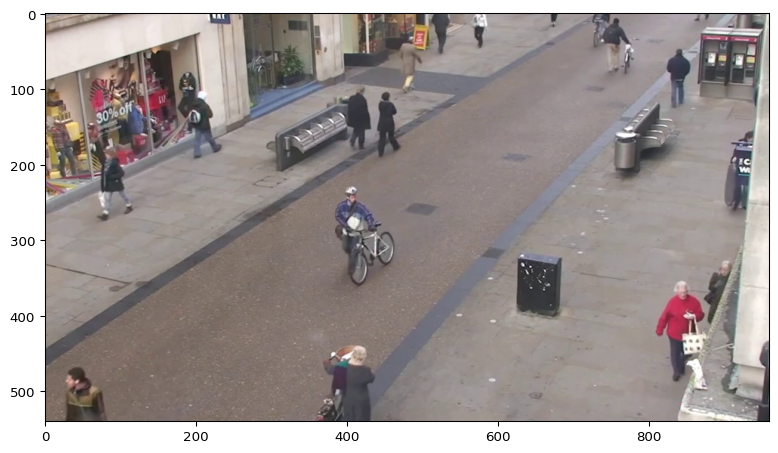

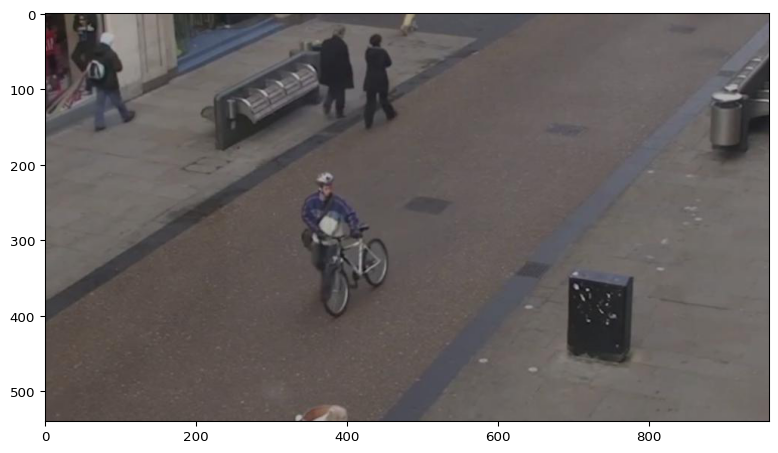

In [34]:
simple_image = imageio.imread(train + "/" + "30.jpg")
augmented_image = imageio.imread(common_path +"/"+'aug_images/' + "aug1_30.jpg")
ia.imshow(simple_image)
ia.imshow(augmented_image)

In [35]:
GT = ultimate_augment_df[[ "ids" , "xmin" , "ymin" , "xmax" , "ymax" ]]
GT = GT.dropna(axis = 0)
GT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51892 entries, 0 to 56782
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ids     51892 non-null  object 
 1   xmin    51892 non-null  float32
 2   ymin    51892 non-null  float32
 3   xmax    51892 non-null  float32
 4   ymax    51892 non-null  float32
dtypes: float32(4), object(1)
memory usage: 1.6+ MB


In [36]:
indent = lambda x,y: ''.join(['  ' for _ in range(y)]) + x

factor = 2
train_size = 3090

os.mkdir(common_path + "/" + 'xmls_augmented_1')
name = 'pedestrian'
width, height = 1920 // factor, 1080 // factor

for frame_number in tqdm(range(train_size)):
    
    if frame_number == 3076 or frame_number == 3082 or frame_number == 3086:
        continue
    
        
    Frame = GT.loc[GT["ids"] == frame_number] 
    x1 = list(Frame["xmin"])
    y1 = list(Frame["ymin"])
    x2 = list(Frame["xmax"])
    y2 = list(Frame["ymax"])

    points = [[(round(x1_), round(y1_)), (round(x2_), round(y2_))] for x1_,y1_,x2_,y2_ in zip(x1,y1,x2,y2)]

    with open(os.path.join(common_path + "/" + 'xmls_augmented_1', "aug1_" + str(frame_number) + '.xml'), 'w') as file:
        file.write('<annotation>\n')
        file.write(indent('<filename>' + "aug1_" + str(frame_number) + '.jpg' + '</filename>\n', 1))
        file.write(indent('<size>\n', 1))
        file.write(indent('<width>' + str(width) + '</width>\n', 2))
        file.write(indent('<height>' + str(height) + '</height>\n', 2))
        file.write(indent('<depth>3</depth>\n', 2))
        file.write(indent('</size>\n', 1))

        for point in points:

            top_left = point[0]
            bottom_right = point[1]

            if top_left[0] > bottom_right[0]:
                xmax, xmin = top_left[0] // factor, bottom_right[0] // factor
            else:
                xmin, xmax = top_left[0] // factor, bottom_right[0] // factor

            if top_left[1] > bottom_right[1]:
                ymax, ymin = top_left[1] // factor, bottom_right[1] // factor
            else:
                ymin, ymax = top_left[1] // factor, bottom_right[1] // factor

            file.write(indent('<object>\n', 1))
            file.write(indent('<name>' + name + '</name>\n', 2))
            file.write(indent('<bndbox>\n', 2))
            file.write(indent('<xmin>' + str(xmin) + '</xmin>\n', 3))
            file.write(indent('<ymin>' + str(ymin) + '</ymin>\n', 3))
            file.write(indent('<xmax>' + str(xmax) + '</xmax>\n', 3))
            file.write(indent('<ymax>' + str(ymax) + '</ymax>\n', 3))
            file.write(indent('</bndbox>\n', 2))
            file.write(indent('</object>\n', 1))


        file.write('</annotation>\n')

100%|██████████| 3090/3090 [00:42<00:00, 72.75it/s]


In [37]:
len(os.listdir(common_path + "/xmls_augmented_1"))

3087

In [38]:
def class_text_to_int(row_label):
    if row_label == 'pedestrian':
        return 1
    else:
        None


def split(df, group):
    data = namedtuple('data', ['filename', 'object'])
    gb = df.groupby(group)
    return [data(filename, gb.get_group(x)) for filename, x in zip(gb.groups.keys(), gb.groups)]

In [39]:
def create_tf_example(group, path):
    with tf.gfile.GFile(os.path.join(path, '{}'.format(group.filename)), 'rb') as fid:
        encoded_jpg = fid.read()
    encoded_jpg_io = io.BytesIO(encoded_jpg)
    image = Image.open(encoded_jpg_io)
    width, height = image.size

    filename = group.filename.encode('utf8')
    image_format = b'jpg'
    xmins = []
    xmaxs = []
    ymins = []
    ymaxs = []
    classes_text = []
    classes = []

    for index, row in group.object.iterrows():
        xmins.append(row['xmin'] / width)
        xmaxs.append(row['xmax'] / width)
        ymins.append(row['ymin'] / height)
        ymaxs.append(row['ymax'] / height)
        classes_text.append(row['class'].encode('utf8'))
        classes.append(class_text_to_int(row['class']))

    tf_example = tf.train.Example(features=tf.train.Features(feature={
        'image/height': dataset_util.int64_feature(height),
        'image/width': dataset_util.int64_feature(width),
        'image/filename': dataset_util.bytes_feature(filename),
        'image/source_id': dataset_util.bytes_feature(filename),
        'image/encoded': dataset_util.bytes_feature(encoded_jpg),
        'image/format': dataset_util.bytes_feature(image_format),
        'image/object/bbox/xmin': dataset_util.float_list_feature(xmins),
        'image/object/bbox/xmax': dataset_util.float_list_feature(xmaxs),
        'image/object/bbox/ymin': dataset_util.float_list_feature(ymins),
        'image/object/bbox/ymax': dataset_util.float_list_feature(ymaxs),
        'image/object/class/text': dataset_util.bytes_list_feature(classes_text),
        'image/object/class/label': dataset_util.int64_list_feature(classes),
    }))
    return tf_example

In [40]:
group_list = split(xml_df , "filename")
len(group_list)

3580

In [41]:
xml_train = group_list[:int(0.8*len(group_list))]
xml_val = group_list[len(xml_train):]

print("Train size {} images".format(len(xml_train)))
print("val size {} images".format(len(xml_val)))

Train size 2864 images
val size 716 images


In [42]:
def main(type_of_data , name):
    writer = tf.python_io.TFRecordWriter(common_path + name)
    path = train
    grouped = type_of_data
    for group in tqdm(grouped , ncols=100):
        tf_example = create_tf_example(group, path)
        writer.write(tf_example.SerializeToString())

    writer.close()
    output_path = common_path + "/train.record"
    print('Successfully created the TFRecords: {}'.format(output_path))

In [43]:
main(type_of_data=xml_train , name = "/train.record")
main(type_of_data=xml_val , name="/val.record")

100%|██████████████████████████████████████████████████████████| 2864/2864 [00:26<00:00, 106.99it/s]


Successfully created the TFRecords: /content/drive/MyDrive/yolo btp/oxfordtowncenter/train.record


100%|████████████████████████████████████████████████████████████| 716/716 [00:06<00:00, 116.00it/s]

Successfully created the TFRecords: /content/drive/MyDrive/yolo btp/oxfordtowncenter/train.record


In [44]:
os.listdir(common_path)

['train',
 'TownCentre-groundtruth.top.txt',
 'TownCentreXVID.mp4',
 'test',
 'xmls',
 'train2',
 'ultimate_data.pickle',
 'aug_images',
 'ultimate_augment_data.pickle',
 'xmls_augmented_1',
 'train.record',
 'val.record']